# Implementation of Deustch Josza Algorithm with n number of qubits:

In [1]:
# Importing necessary libraries:
import qiskit as q
from random import getrandbits
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [2]:
# Defining the constant and balanced oracle:
def constant_oraclen(n, x, qc):
    if x == '0':
        pass
    elif x == '1':
        for i in range(int(n)):
            qc.x(i+1)       
        
def balanced_oraclen(n, x, qc):
    if x == '0':
        for i in range(int(n)):
            qc.cx(i, int(n))
    elif x == '1':
        for i in range(int(n)):
            qc.x(i)
            qc.cx(i, int(n))        

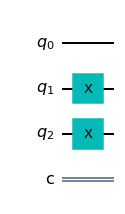

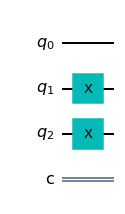

In [3]:
# Testing oracles:
qc= QuantumCircuit(3,1)
constant_oraclen(2, '1', qc)
qc.draw()

In [4]:
def random_oraclen(n, qc): # Selectiong type of oracle 
    if str(getrandbits(1)) == '0':
        constant_oraclen(n, str(getrandbits(1)), qc)
    elif str(getrandbits(1)) == '1':
        balanced_oraclen(n, str(getrandbits(1)), qc)

In [5]:
def make_circuitn(n): # Constructiong function to produce n qubit circuit
    qc= QuantumCircuit(int(n+1),1)  # with required oracle (constant/balanced)
    for i in range(int(n+1)):
        if i > 0:
            qc.x(i)
    for i in range(int(n+1)):
        qc.h(i)  
    qc.barrier()    
    random_oraclen(n, qc)
    qc.barrier()
    for i in range(int(n+1)):
        qc.h(i) 
    qc.measure(0,0)
    return qc

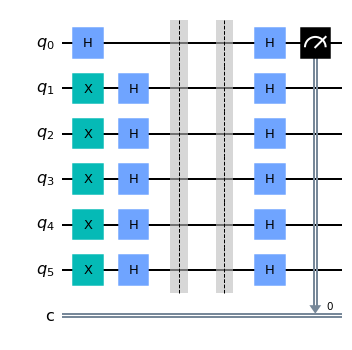

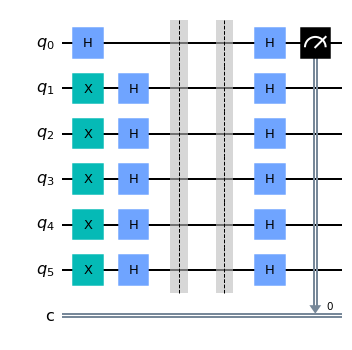

In [6]:
# An example of 5 qubit circuit:
q1= QuantumCircuit()
q1= make_circuitn(5)
q1.draw('mpl')

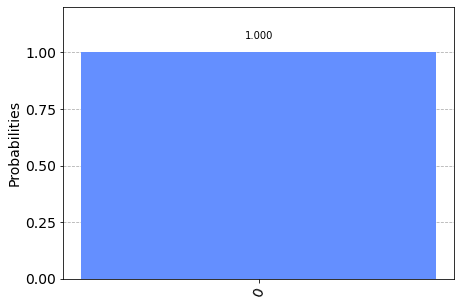

{'0': 3000}


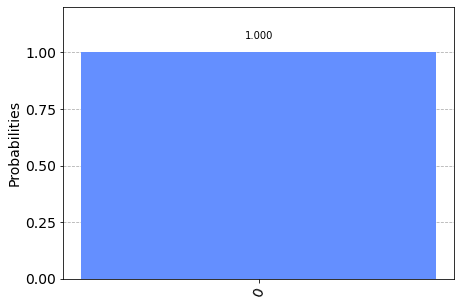

In [7]:
# Running in qasm simulator:
backend= Aer.get_backend('qasm_simulator')
job= execute(q1, backend, shots= 3000)
results= job.result()
counts= results.get_counts()
graph= plot_histogram(counts)
display(graph)
print(counts)